importamos Librerias 

In [1]:
import warnings
warnings.filterwarnings("ignore")


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
import pandas as pd
import locale

# Tabla Número de turistas extrajeros según país de residencia desde Octubre 2015

https://ine.es/dyngs/INEbase/operacion.htm?c=Estadistica_C&cid=1254736176996&menu=ultiDatos&idp=1254735576863



Desde enero de 2022, Turquía se clasifica dentro del agregado "Resto de Europa"

Con fecha 3 de abril se han corregido los datos de esta tabla, incluyendo Turquía en Europa

Desde marzo de 2022, se incluye "Rusia" en el agregado "Resto de Europa"

Los datos de enero del año 2025 y posteriores son provisionales.

In [2]:
ruta = r"C:\Users\giuia\OneDrive\ESPECIALIZACION\Proyecto_Data_Analitycs\BBDD\Número de turistas según país de residencia.csv"
Turista_pais_residencia = pd.read_csv(ruta, encoding='latin1', sep=';')

Turista_pais_residencia

,ï»¿PaÃ­s de residencia,Tipo de dato,Periodo,Total
0,Total,Dato base,2025M01,5.065.094
1,Total,Dato base,2024M12,5.264.375
2,Total,Dato base,2024M11,5.670.219
3,Total,Dato base,2024M10,8.961.932
4,Total,Dato base,2024M09,9.602.015
...,...,...,...,...
7163,Resto del Mundo,Tasa de variaciÃ³n acumulada,2016M02,"29,13"
7164,Resto del Mundo,Tasa de variaciÃ³n acumulada,2016M01,"23,65"
7165,Resto del Mundo,Tasa de variaciÃ³n acumulada,2015M12,NaN
7166,Resto del Mundo,Tasa de variaciÃ³n acumulada,2015M11,NaN


ETL

In [5]:
# Cambiar nombre columna
Turista_pais_residencia.rename(columns= {'ï»¿PaÃ­s de residencia': 'Pais_residencia' }, inplace=True)

# borrar los Totales anuales + los que no son dato base porque no nos interesan 
Turista_pais_residencia.drop(
    Turista_pais_residencia[
        (Turista_pais_residencia['Pais_residencia'] == 'Total') |
        (Turista_pais_residencia['Tipo de dato'] != 'Dato base')
    ].index,
    inplace=True
)

# Extraer el año y el mes con split M
Turista_pais_residencia["Año"] = Turista_pais_residencia["Periodo"].str.split('M').str[0]
Turista_pais_residencia["mes"] = Turista_pais_residencia["Periodo"].str.split('M').str[1]



# Convertir a números
Turista_pais_residencia["mes"] = pd.to_numeric(Turista_pais_residencia["mes"], errors='coerce')
Turista_pais_residencia['Año'] = Turista_pais_residencia['Año'].astype(int)


# Extraer el nombre del mes en español
Turista_pais_residencia["Nom_mes"] = pd.to_datetime(Turista_pais_residencia["mes"], format='%m').dt.month_name(locale='es_ES.UTF-8')


# Reemplazar los valores en la columna 'Pais_residencia'
Turista_pais_residencia['Pais_residencia'] = Turista_pais_residencia["Pais_residencia"].replace({
    "BÃ©lgica": "Belgica",
    "PaÃ\xadses Bajos": "Paises bajos",
    "PaÃ\xadses NÃ³rdicos": "Paises nordicos",
    "Estados Unidos de AmÃ©rica" : "USA",
    "Resto AmÃ©rica": "Resto america"
    
})

 # borrar columnas no necesarias
Turista_pais_residencia.drop(['Periodo', 'Tipo de dato'], axis=1, inplace=True)



# Reemplazar los valores que solo tienen un punto (".") por NaN
Turista_pais_residencia['Total'] = Turista_pais_residencia['Total'].replace('.', np.nan)
# Eliminar los puntos de los números y mantener NaN
Turista_pais_residencia['Total'] = Turista_pais_residencia['Total'].str.replace('.', '', regex=False)
# Convertir a número entero, manteniendo los NaN
Turista_pais_residencia['Total'] = pd.to_numeric(Turista_pais_residencia['Total'], errors='coerce')
# Reemplazar los ceros por NaN
Turista_pais_residencia['Total'].replace(0, np.nan, inplace=True)
# Convertir a Int64 para permitir NaN en columnas enteras
Turista_pais_residencia['Total'] = Turista_pais_residencia['Total'].astype('Int64')

# Mover la columna 'Total' al final
columnas = [col for col in Turista_pais_residencia.columns if col != 'Total'] + ['Total']
Turista_pais_residencia = Turista_pais_residencia[columnas]

# Borrar registros Rusia  2023-25
Turista_pais_residencia.drop(
    Turista_pais_residencia[
    (Turista_pais_residencia['Pais_residencia'] == 'Rusia') &
    (Turista_pais_residencia['Año'].between(2023,2025))
    ].index,inplace= True
)

# Eliminar registros rusia 2022 con Total = null
Turista_pais_residencia.drop(
    Turista_pais_residencia[
        (Turista_pais_residencia['Pais_residencia'] == 'Rusia') & 
        (Turista_pais_residencia['Año'] == 2022) & 
        (Turista_pais_residencia['Total'].isna())  
    ].index, 
    inplace=True
)

In [6]:
Turista_pais_residencia

,Pais_residencia,Año,mes,Nom_mes,Total
448,Alemania,2025,1,Enero,537842
449,Alemania,2024,12,Diciembre,623545
450,Alemania,2024,11,Noviembre,650582
451,Alemania,2024,10,Octubre,1305958
452,Alemania,2024,9,Septiembre,1313851
...,...,...,...,...,...
6827,Resto del Mundo,2016,2,Febrero,249785
6828,Resto del Mundo,2016,1,Enero,246638
6829,Resto del Mundo,2015,12,Diciembre,223824
6830,Resto del Mundo,2015,11,Noviembre,242798


# Tabla Número de turistas extrajeros según comunidad autónoma de destino principal desde  2016

In [7]:
ruta = r"C:\Users\giuia\OneDrive\ESPECIALIZACION\Proyecto_Data_Analitycs\BBDD\Número de turistas según comunidad autónoma de destino principal.csv"
Turista_comunidad_autonoma = pd.read_csv(ruta, encoding='latin1', sep=';')

Turista_comunidad_autonoma

,ï»¿Comunidades autÃ³nomas,Tipo de dato,Periodo,Total
0,Total,Dato base,2024,93.759.297
1,Total,Dato base,2023,85.169.050
2,Total,Dato base,2022,71.659.281
3,Total,Dato base,2021,31.180.802
4,Total,Dato base,2020,18.933.103
...,...,...,...,...
355,19 Melilla,Tasa de variaciÃ³n anual,2020,NaN
356,19 Melilla,Tasa de variaciÃ³n anual,2019,NaN
357,19 Melilla,Tasa de variaciÃ³n anual,2018,NaN
358,19 Melilla,Tasa de variaciÃ³n anual,2017,NaN


ETL

In [8]:
# Cambiar nombre columna
Turista_comunidad_autonoma.rename(columns= {'ï»¿Comunidades autÃ³nomas': 'Comunidad_autonoma' }, inplace=True)

# Reemplazar los valores en la columna 'Comunidad_autonoma'
Turista_comunidad_autonoma['Comunidad_autonoma'] = Turista_comunidad_autonoma['Comunidad_autonoma'].replace({
    '01 AndalucÃ\xada': 'Andalucía',
    '02 AragÃ³n': 'Aragón',
    '03 Asturias, Principado de': 'Asturias',
    '04 Balears, Illes': 'Islas Baleares',
    '05 Canarias': 'Canarias',
    '06 Cantabria': 'Cantabria',
    '07 Castilla y LeÃ³n': 'Castilla y León',
    '08 Castilla - La Mancha': 'Castilla-La Mancha',
    '09 CataluÃ±a': 'Cataluña',
    '10 Comunitat Valenciana': 'Comunidad Valenciana',
    '11 Extremadura': 'Extremadura',
    '12 Galicia': 'Galicia',
    '13 Madrid, Comunidad de': 'Comunidad de Madrid',
    '14 Murcia, RegiÃ³n de': 'Región de Murcia',
    '15 Navarra, Comunidad Foral de': 'Navarra',
    '16 PaÃ\xads Vasco': 'País Vasco',
    '17 Rioja, La': 'La Rioja',
    '18 Ceuta': 'Ceuta',
    '19 Melilla': 'Melilla'
})


# borrar los que no son dato base porque no nos interesan 
Turista_comunidad_autonoma.drop(
    Turista_comunidad_autonoma[
        Turista_comunidad_autonoma['Tipo de dato'] != 'Dato base'
    ].index,
    inplace=True
)

# Borrar columnas no necesarias
Turista_comunidad_autonoma.drop('Tipo de dato', axis=1, inplace=True)

#Reenombrar columna
Turista_comunidad_autonoma.rename(columns={'Periodo': 'Año'}, inplace=True)

# Tabla numero de visitantes + tot pernoctaciones ( nacionales y extranjeros) por tipo de alojamiento y comunidad autónoma desde Octubre 2015

La Encuesta de ocupación hotelera ofrece información sobre viajeros, pernoctaciones y estancia media, distribuidos por país de residencia para los viajeros extranjeros o comunidad autónoma de procedencia para los viajeros españoles,así como la categoría de los establecimientos que ocupan. También proporciona estimaciones del número de establecimientos abiertos, plazas, grado de ocupación y empleo en el sector, según categoría del establecimiento.

https://ine.es/dyngs/INEbase/operacion.htm?c=Estadistica_C&cid=1254736177015&menu=ultiDatos&idp=1254735576863

In [9]:
ruta = r"C:\Users\giuia\OneDrive\ESPECIALIZACION\Proyecto_Data_Analitycs\BBDD\Viajeros, pernoctaciones por tipo de alojamiento por comunidades y ciudades autónomas.csv"
viajeros_por__tipo_alojamiento = pd.read_csv(ruta, encoding='latin1', sep=';')

viajeros_por__tipo_alojamiento


,ï»¿Tipo de alojamiento,Total Nacional,Comunidades y Ciudades AutÃ³nomas,Residencia: Nivel 1,Residencia: Nivel 2,Viajeros y pernoctaciones,Periodo,Total
0,Encuesta de OcupaciÃ³n Hotelera,Total Nacional,NaN,Total,NaN,Viajero,2025M01,5.776.075
1,Encuesta de OcupaciÃ³n Hotelera,Total Nacional,NaN,Total,NaN,Viajero,2024M12,6.553.489
2,Encuesta de OcupaciÃ³n Hotelera,Total Nacional,NaN,Total,NaN,Viajero,2024M11,7.171.221
3,Encuesta de OcupaciÃ³n Hotelera,Total Nacional,NaN,Total,NaN,Viajero,2024M10,10.774.309
4,Encuesta de OcupaciÃ³n Hotelera,Total Nacional,NaN,Total,NaN,Viajero,2024M09,11.821.379
...,...,...,...,...,...,...,...,...
173395,Encuesta de OcupaciÃ³n en Albergues,Total Nacional,19 Melilla,Total,Residentes en el Extranjero,Pernoctaciones,2001M05,NaN
173396,Encuesta de OcupaciÃ³n en Albergues,Total Nacional,19 Melilla,Total,Residentes en el Extranjero,Pernoctaciones,2001M04,NaN
173397,Encuesta de OcupaciÃ³n en Albergues,Total Nacional,19 Melilla,Total,Residentes en el Extranjero,Pernoctaciones,2001M03,NaN
173398,Encuesta de OcupaciÃ³n en Albergues,Total Nacional,19 Melilla,Total,Residentes en el Extranjero,Pernoctaciones,2001M02,NaN


ETL

In [10]:
# Transformar total a int y remplazar nan por 0
viajeros_por__tipo_alojamiento['Total'].fillna(0)
viajeros_por__tipo_alojamiento.Total = viajeros_por__tipo_alojamiento.Total.str.replace('.', '')
viajeros_por__tipo_alojamiento.Total.fillna(0, inplace=True)
viajeros_por__tipo_alojamiento['Total'].replace('', 0, inplace=True)
viajeros_por__tipo_alojamiento.Total = viajeros_por__tipo_alojamiento.Total.astype(int)



# Establecer la configuración regional a español (España)
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')



# Extraer el año y el mes con split M
viajeros_por__tipo_alojamiento["Año"] = viajeros_por__tipo_alojamiento["Periodo"].str.split('M').str[0]
viajeros_por__tipo_alojamiento["mes"] = viajeros_por__tipo_alojamiento["Periodo"].str.split('M').str[1]


# Convertir a números
viajeros_por__tipo_alojamiento["mes"] = pd.to_numeric(viajeros_por__tipo_alojamiento["mes"], errors='coerce')

# Extraer el nombre del mes en español
viajeros_por__tipo_alojamiento["Nom_mes"] = pd.to_datetime(viajeros_por__tipo_alojamiento["mes"], format='%m').dt.month_name(locale='es_ES.UTF-8')

# convertimos a int
viajeros_por__tipo_alojamiento['Año'] = viajeros_por__tipo_alojamiento['Año'].astype(int)


# renombrar columnas
viajeros_por__tipo_alojamiento = viajeros_por__tipo_alojamiento.rename(columns={'ï»¿Tipo de alojamiento': 'Tipo_alojamiento'})
viajeros_por__tipo_alojamiento=  viajeros_por__tipo_alojamiento.rename(columns={'Comunidades y Ciudades AutÃ³nomas': 'Comunidad_autonoma'})
viajeros_por__tipo_alojamiento=  viajeros_por__tipo_alojamiento.rename(columns={'Residencia: Nivel 2': 'Residencia'})

#borramos columnas no necesaria
viajeros_por__tipo_alojamiento = viajeros_por__tipo_alojamiento.drop(
    columns=['Residencia: Nivel 1',  'Total Nacional', 'Periodo']
)


# Reemplazar los valores en la columna 'Tipo_alojamiento'
viajeros_por__tipo_alojamiento['Tipo_alojamiento'] = viajeros_por__tipo_alojamiento['Tipo_alojamiento'].replace({
    'Encuesta de OcupaciÃ³n Hotelera': "Hotel",
    'Encuesta de OcupaciÃ³n en Campings': "Camping",
    'Encuesta de OcupaciÃ³n en Apartamentos TurÃ\xadsticos': " Apartamento turistico",
    'Encuesta de OcupaciÃ³n en Alojamientos de Turismo Rural': " Alojamiento rural",
    'Encuesta de OcupaciÃ³n en Albergues' : "Albergue"
    
})

# Reemplazar los valores en la columna 'Comunidad_autonoma'
viajeros_por__tipo_alojamiento['Comunidad_autonoma'] = viajeros_por__tipo_alojamiento['Comunidad_autonoma'].replace({
    '01 AndalucÃ\xada': 'Andalucía',
    '02 AragÃ³n': 'Aragón',
    '03 Asturias, Principado de': 'Asturias',
    '04 Balears, Illes': 'Islas Baleares',
    '05 Canarias': 'Canarias',
    '06 Cantabria': 'Cantabria',
    '07 Castilla y LeÃ³n': 'Castilla y León',
    '08 Castilla - La Mancha': 'Castilla-La Mancha',
    '09 CataluÃ±a': 'Cataluña',
    '10 Comunitat Valenciana': 'Comunidad Valenciana',
    '11 Extremadura': 'Extremadura',
    '12 Galicia': 'Galicia',
    '13 Madrid, Comunidad de': 'Comunidad de Madrid',
    '14 Murcia, RegiÃ³n de': 'Región de Murcia',
    '15 Navarra, Comunidad Foral de': 'Navarra',
    '16 PaÃ\xads Vasco': 'País Vasco',
    '17 Rioja, La': 'La Rioja',
    '18 Ceuta': 'Ceuta',
    '19 Melilla': 'Melilla'
})

# Reemplazar los valores en la columna 'Residencia: Nivel 2
viajeros_por__tipo_alojamiento['Residencia'] = viajeros_por__tipo_alojamiento['Residencia'].replace({
    'Residentes en EspaÃ±a': "España",
    'Residentes en el Extranjero' : 'Extranjero'
    
})



# eliminar solo los nan de la columna 'Comunidad_autonoma' y ' Residencia que representan los totales nacionales,parte inicial del dataset que no nos interesa
viajeros_por__tipo_alojamiento = viajeros_por__tipo_alojamiento.dropna(subset=['Comunidad_autonoma'])
viajeros_por__tipo_alojamiento = viajeros_por__tipo_alojamiento.dropna(subset=['Residencia'])

# Mover la columna 'Total' al final
columnas = [col for col in viajeros_por__tipo_alojamiento.columns if col != 'Total'] + ['Total']
viajeros_por__tipo_alojamiento = viajeros_por__tipo_alojamiento[columnas]

# eliminar registros anteriores al año 2015
viajeros_por__tipo_alojamiento = viajeros_por__tipo_alojamiento.drop(
    viajeros_por__tipo_alojamiento[viajeros_por__tipo_alojamiento['Año'] < 2015].index
)

# eliminar registros del 2015 hasta Septiembre para respectar temporalidad dataset anterior
viajeros_por__tipo_alojamiento = viajeros_por__tipo_alojamiento.drop(
    viajeros_por__tipo_alojamiento[
        (viajeros_por__tipo_alojamiento['Año'] < 2015) |  
        ((viajeros_por__tipo_alojamiento['Año'] == 2015) & (viajeros_por__tipo_alojamiento['mes'].between(1, 9)))
    ].index
)



In [11]:
viajeros_por__tipo_alojamiento

,Tipo_alojamiento,Comunidad_autonoma,Residencia,Viajeros y pernoctaciones,Año,mes,Nom_mes,Total
2312,Hotel,Andalucía,España,Viajero,2025,1,Enero,528371
2313,Hotel,Andalucía,España,Viajero,2024,12,Diciembre,646530
2314,Hotel,Andalucía,España,Viajero,2024,11,Noviembre,675397
2315,Hotel,Andalucía,España,Viajero,2024,10,Octubre,796871
2316,Hotel,Andalucía,España,Viajero,2024,9,Septiembre,991041
...,...,...,...,...,...,...,...,...
173218,Albergue,Melilla,Extranjero,Pernoctaciones,2016,2,Febrero,0
173219,Albergue,Melilla,Extranjero,Pernoctaciones,2016,1,Enero,0
173220,Albergue,Melilla,Extranjero,Pernoctaciones,2015,12,Diciembre,0
173221,Albergue,Melilla,Extranjero,Pernoctaciones,2015,11,Noviembre,0


Creación mapa españa

In [3]:
import geopandas as gpd

# Cargar el shapefile desde la ruta específica
ruta_shapefile = r"C:\Users\giuia\OneDrive\ESPECIALIZACION\Proyecto_Data_Analitycs\BBDD\gadm41_ESP_shp\gadm41_ESP_1.shp"

# Leer el archivo
mapa = gpd.read_file(ruta_shapefile)

# Mostrar los primeros registros para verificar que se ha cargado bien
print(mapa.head())


     GID_1 GID_0 COUNTRY              NAME_1  \
0  ESP.1_1   ESP   Spain           Andalucía   
1  ESP.2_1   ESP   Spain              Aragón   
2  ESP.3_1   ESP   Spain           Cantabria   
3  ESP.4_1   ESP   Spain  Castilla-La Mancha   
4  ESP.5_1   ESP   Spain     Castilla y León   

                          VARNAME_1 NL_NAME_1              TYPE_1  \
0  Andalousie|Andaluc¡a|Andalusien|        NA  Comunidad Autónoma   
1  Aragão|Aragó|Aragón|Aragona|Arag        NA  Comunidad Autónoma   
2  Cantàbria|Cantábria|Cantabrie|Ka        NA  Comunidad Autónoma   
3  Castela-La Mancha|Castela-Mancha        NA  Comunidad Autónoma   
4  Castile and Leon|Castela e Leão|        NA  Comunidad Autónoma   

              ENGTYPE_1 CC_1 HASC_1  ISO_1  \
0  Autonomous Community   01  ES.AN     NA   
1  Autonomous Community   15  ES.AR     NA   
2  Autonomous Community   06  ES.CB  ES-CB   
3  Autonomous Community   08  ES.CM  ES-CM   
4  Autonomous Community   07  ES.CL     NA   

                   

Crear mapa de España usando la columna NAME_1, que contiene los nombres de las Comunidades Autónomas.

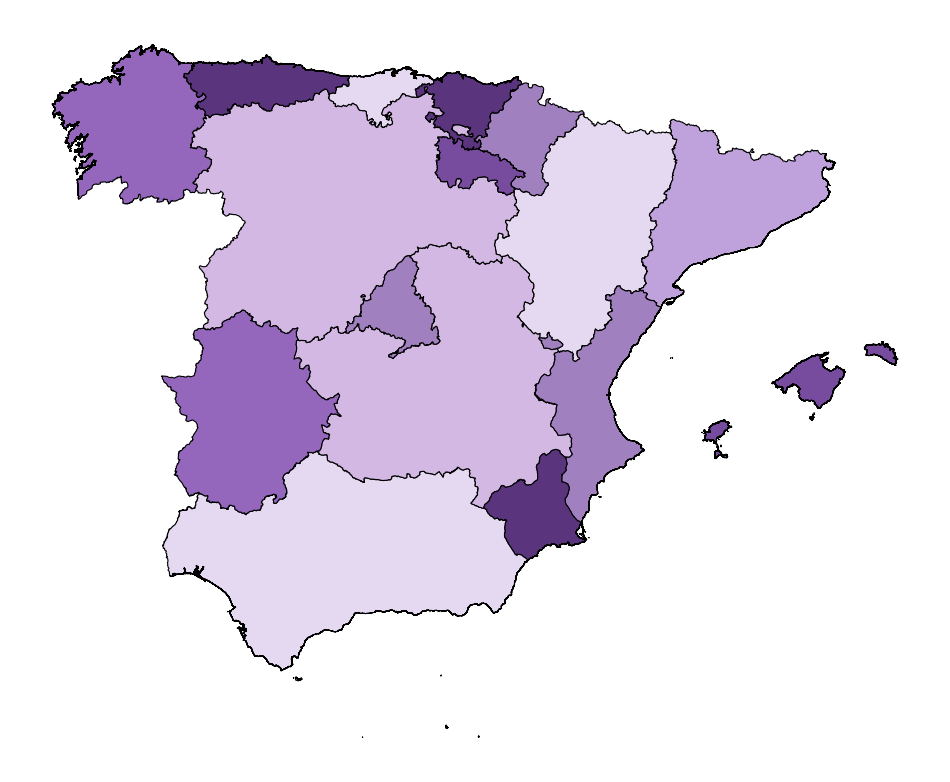

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Ruta del archivo shapefile
ruta_shapefile = r"C:\Users\giuia\OneDrive\ESPECIALIZACION\Proyecto_Data_Analitycs\BBDD\gadm41_ESP_shp\gadm41_ESP_1.shp"

# Cargar el shapefile
mapa = gpd.read_file(ruta_shapefile)

# Verificar los nombres únicos (puedes descomentar esta línea para verlos)
# print(mapa["NAME_1"].unique())

# Filtrar para eliminar cualquier fila que contenga "Canarias"
mapa_sin_canarias = mapa[~mapa["NAME_1"].str.contains("Canarias", case=False, na=False)]

# Paleta de violetas personalizada
paleta_violetas = ListedColormap(["#E5D9F2", "#D2B8E3", "#BFA2DB", "#A180C0", "#9467BD", "#774C9E", "#5A357E"])

# Crear figura sin fondo blanco
fig, ax = plt.subplots(figsize=(12, 12), facecolor='none')

# Dibujar el mapa sin Canarias
mapa_sin_canarias.plot(column="NAME_1", cmap=paleta_violetas, edgecolor="black", linewidth=0.8, legend=False, ax=ax)

# Quitar ejes y bordes
ax.set_frame_on(False)
ax.set_axis_off()
ax.set_xticks([])
ax.set_yticks([])

# Guardar la imagen sin fondo
plt.savefig("mapa_espana_sin_canarias.png", dpi=600, bbox_inches="tight", transparent=True)

# Mostrar el resultado
plt.show()


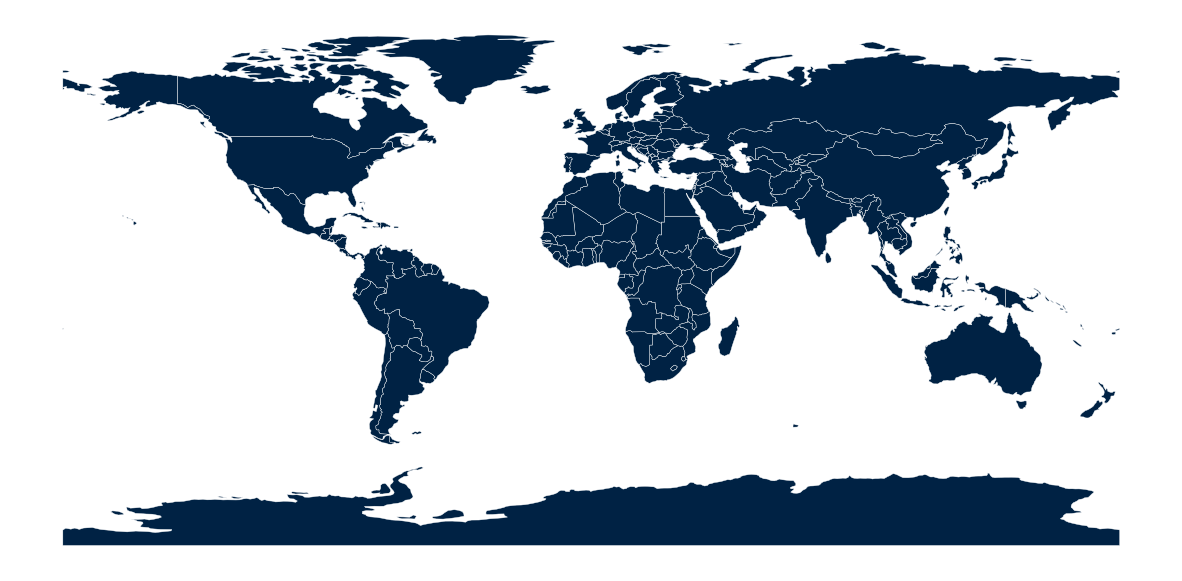

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Ruta al shapefile descargado del mundo
ruta_mundo = r"C:\Users\giuia\OneDrive\ESPECIALIZACION\Proyecto_Data_Analitycs\Mapas de España\ne_110m_admin_0_countries (1)\ne_110m_admin_0_countries.shp"

# Cargar el shapefile
mundo = gpd.read_file(ruta_mundo)

# Crear la figura sin fondo blanco
fig, ax = plt.subplots(figsize=(15, 10), facecolor='none')  # fondo transparente

# Pintar el mundo en azul oscuro profundo
mundo.plot(color="#002244", edgecolor="white", linewidth=0.3, ax=ax)

# Eliminar bordes y ejes
ax.set_frame_on(False)
ax.set_axis_off()

# Guardar como imagen sin fondo (transparente)
plt.savefig("mapamundi_blue_dark_sin_fondo.png", dpi=600, bbox_inches="tight", transparent=True)

# Mostrar resultado
plt.show()



#  Tabla Número de turistas extrajeros  según motivo principal del viaje desde Octubre 2015


Estadística de Movimientos Turísticos en Fronteras (FRONTUR)

https://ine.es/dyngs/INEbase/operacion.htm?c=Estadistica_C&cid=1254736176996&menu=ultiDatos&idp=1254735576863

In [14]:
ruta = r"C:\Users\giuia\OneDrive\ESPECIALIZACION\Proyecto_Data_Analitycs\BBDD\Número de turistas según motivo principal del viaje.csv"
motivo_viaje = pd.read_csv(ruta, encoding='latin1', sep=';')

motivo_viaje

,ï»¿Motivo del viaje,Tipo de dato,Periodo,Total
0,Total,Dato base,2025M01,5.065.094
1,Total,Dato base,2024M12,5.264.375
2,Total,Dato base,2024M11,5.670.219
3,Total,Dato base,2024M10,8.961.932
4,Total,Dato base,2024M09,9.602.015
...,...,...,...,...
1787,Otros motivos,Tasa de variaciÃ³n acumulada,2016M02,"38,85"
1788,Otros motivos,Tasa de variaciÃ³n acumulada,2016M01,"46,29"
1789,Otros motivos,Tasa de variaciÃ³n acumulada,2015M12,NaN
1790,Otros motivos,Tasa de variaciÃ³n acumulada,2015M11,NaN


ETL

In [15]:
# Renombrar columna
motivo_viaje.rename(columns= {'ï»¿Motivo del viaje': 'Motivo'}, inplace= True)

# borrar los Totales anuales + los que no son dato base porque no nos interesan 
motivo_viaje.drop(
    motivo_viaje[
        (motivo_viaje['Motivo'] == 'Total') |
        (motivo_viaje['Tipo de dato'] != 'Dato base')
    ].index,
    inplace=True
)

# Transformar total a int y remplazar nan por 0
motivo_viaje['Total'].fillna(0)
motivo_viaje.Total = motivo_viaje.Total.str.replace('.', '')
motivo_viaje.Total.fillna(0, inplace=True)
motivo_viaje['Total'].replace('', 0, inplace=True)
motivo_viaje.Total = motivo_viaje.Total.astype(int)



# Establecer la configuración regional a español (España)
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')



# Extraer el año y el mes con split M
motivo_viaje["Año"] = motivo_viaje["Periodo"].str.split('M').str[0]
motivo_viaje["mes"] = motivo_viaje["Periodo"].str.split('M').str[1]


# Convertir a números
motivo_viaje["mes"] = pd.to_numeric(motivo_viaje["mes"], errors='coerce')

# Extraer el nombre del mes en español
motivo_viaje["Nom_mes"] = pd.to_datetime(motivo_viaje["mes"], format='%m').dt.month_name(locale='es_ES.UTF-8')

# convertir a int
motivo_viaje['Año'] = motivo_viaje['Año'].astype(int)


# borrar columnas no necesarias
motivo_viaje.drop(['Periodo', 'Tipo de dato'], axis=1, inplace=True)



In [16]:
motivo_viaje

,Motivo,Total,Año,mes,Nom_mes
448,"Ocio, recreo y vacaciones",4119870,2025,1,Enero
449,"Ocio, recreo y vacaciones",4257518,2024,12,Diciembre
450,"Ocio, recreo y vacaciones",4622268,2024,11,Noviembre
451,"Ocio, recreo y vacaciones",7796628,2024,10,Octubre
452,"Ocio, recreo y vacaciones",8474002,2024,9,Septiembre
...,...,...,...,...,...
1451,Otros motivos,423403,2016,2,Febrero
1452,Otros motivos,506662,2016,1,Enero
1453,Otros motivos,579120,2015,12,Diciembre
1454,Otros motivos,435490,2015,11,Noviembre


# Tabla Gasto medio por visitantes extranjeros según comunidad autónoma y país de residencia  2018 - 2023

Estadística experimental.

Estadística experimental. Distribución del gasto realizado por los visitantes extranjeros en sus visitas a España

El objetivo de esta estadística experimental es proporcionar información trimestral sobre el gasto en destino real realizado por los visitantes extranjeros en sus visitas a España, con el fin de obtener una mayor desagregación que la proporcionada por la Encuesta de gasto turístico (EGATUR), tanto de los países de residencia como de las comunidades autónomas de destino. Todo ello considerando las premisas de secreto y significatividad estadística.

La información de base es la Encuesta de gasto turístico a la que se ha incorporado información auxiliar de transacciones bancarias realizadas a través de tarjetas por los visitantes no residentes en España en sus viajes o excursiones en nuestro país. Estas transacciones incluyen las realizadas a través de tarjeta de manera presencial (pagos realizados a través de Terminal Punto de Venta o TPV), así como retiradas de efectivo en cajeros.

In [2]:
ruta = r"C:\Users\giuia\OneDrive\ESPECIALIZACION\Proyecto_Data_Analitycs\BBDD\Gasto medio por visitante según comunidad autónoma y país de residencia.csv"
gasto_medio = pd.read_csv(ruta, encoding='latin1', sep=';')

gasto_medio

,ï»¿Comunidades y Ciudades AutÃ³nomas de destino,PaÃ­s de residencia,Periodo,Total
0,AndalucÃ­a,Total,2023,"445,66"
1,AndalucÃ­a,Total,2022,"437,83"
2,AndalucÃ­a,Total,2021,"416,6"
3,AndalucÃ­a,Total,2020,"365,11"
4,AndalucÃ­a,Total,2019,"370,9"
...,...,...,...,...
4441,Melilla,Resto del Mundo,2022,"1.248,66"
4442,Melilla,Resto del Mundo,2021,"627,4"
4443,Melilla,Resto del Mundo,2020,.
4444,Melilla,Resto del Mundo,2019,.


ETL

In [136]:
# Renombrar columnas

gasto_medio.rename(columns={'ï»¿Comunidades y Ciudades AutÃ³nomas de destino': 'Destino','PaÃ­s de residencia': 'Pais_residencia', 'Periodo': 'Año'}, inplace= True)

# remplazar , por . -  Convertir a Float y pasar nana a 0
gasto_medio['Total'] = pd.to_numeric(gasto_medio['Total'].str.replace(',', '.'), errors='coerce').astype(float)


# Reemplazar los valores en la columna 'Destino'
gasto_medio['Destino'] = gasto_medio['Destino'].replace({
    'AndalucÃ\xada': 'Andalucía',
    'AragÃ³n': 'Aragón',
    'Asturias, Principado de': 'Asturias',
    'Balears, Illes': 'Islas Baleares',
    'Cantabria': 'Cantabria',
    'Castilla y LeÃ³n': 'Castilla y León',
    'Castilla - La Mancha': 'Castilla-La Mancha',
    'CataluÃ±a': 'Cataluña',
    'Comunitat Valenciana': 'Comunidad Valenciana',
    'Extremadura': 'Extremadura',
    'Galicia': 'Galicia',
    'Madrid, Comunidad de': 'Comunidad de Madrid',
    'Murcia, RegiÃ³n de': 'Región de Murcia',
    'Navarra, Comunidad Foral de': 'Navarra',
    'PaÃ\xads Vasco': 'País Vasco',
    'Rioja, La': 'La Rioja',
    'Ceuta': 'Ceuta',
    'Melilla': 'Melilla'
})

# Reemplazar los valores en la 'Pais de Residencia'
gasto_medio['Pais_residencia'] = gasto_medio['Pais_residencia'].replace({
    'AndalucÃ\xada': 'Andalucía',
    'BÃ©lgica': 'Belgica',
    'PaÃ\xadses Bajos': 'Paises Bajos',
    'RumanÃ\xada': 'Rumania',
    'Otros PaÃ\xadses Europeos': 'Otros Paieses Europeos',
    'CanadÃ¡': 'Canada',
    'Estados Unidos de AmÃ©rica': 'USA',
    'MÃ©xico': 'Mexico',
    'Resto de AmÃ©rica': 'Resto de America',
    'Arabia SaudÃ\xad' : ' Arabia Saudi',
    'Emiratos Ã\x81rabes Unidos': 'Emiratos Arebe Unidos',
    'JapÃ³n' : 'Japon',
    'TurquÃ\xada' : 'Turquia'
    
    
})

# borrar los Totales anuales 
'''gasto_medio.drop(
        gasto_medio[gasto_medio['Pais_residencia'] == 'Total'].index,inplace=True)'''

"gasto_medio.drop(\n        gasto_medio[gasto_medio['Pais_residencia'] == 'Total'].index,inplace=True)"

In [137]:
gasto_medio

,Destino,Pais_residencia,Año,Total
0,Andalucía,Total,2023,445.66
1,Andalucía,Total,2022,437.83
2,Andalucía,Total,2021,416.60
3,Andalucía,Total,2020,365.11
4,Andalucía,Total,2019,370.90
...,...,...,...,...
4441,Melilla,Resto del Mundo,2022,NaN
4442,Melilla,Resto del Mundo,2021,627.40
4443,Melilla,Resto del Mundo,2020,NaN
4444,Melilla,Resto del Mundo,2019,NaN


In [138]:

# Filtro quitamos registros sin datos (0)
gasto_medio_filtrado= gasto_medio[
    (gasto_medio['Total'] != 0)
            
            ].sort_values(by= 'Año', ascending= True)
gasto_medio_filtrado

,Destino,Pais_residencia,Año,Total
4445,Melilla,Resto del Mundo,2018,NaN
1307,Cantabria,Canada,2018,388.21
623,Asturias,USA,2018,643.37
2765,Galicia,Corea,2018,275.86
2237,Comunidad Valenciana,Brasil,2018,601.02
...,...,...,...,...
3042,Región de Murcia,Total,2023,799.61
1872,Cataluña,Total,2023,369.45
846,Islas Baleares,Colombia,2023,449.54
1854,Castilla-La Mancha,Japon,2023,420.18


creación DF para analisis de correlación y Shapiro-Wilk test

In [139]:
gasto_medio_anual_corr_CA= gasto_medio[
    (gasto_medio['Pais_residencia'] == 'Total') &
    (gasto_medio['Año'] != 2018) &
    (~gasto_medio['Destino'].isin(['Ceuta', 'Melilla']))
].groupby('Destino')['Total'].mean().reset_index(name= 'Total').round(2)
gasto_medio_anual_corr_CA

,Destino,Total
0,Andalucía,407.22
1,Aragón,291.73
2,Asturias,549.30
3,Canarias,468.25
4,Cantabria,474.14
5,Castilla y León,205.69
6,Castilla-La Mancha,472.02
7,Cataluña,314.13
8,Comunidad Valenciana,642.52
9,Comunidad de Madrid,438.61


In [140]:
from scipy.stats import shapiro

stat, p = shapiro(gasto_medio_anual_corr_CA['Total'].dropna())
print(f'Estadístico={stat:.3f}, p={p:.3f}')

if p > 0.05:
    print("✅ Probablemente distribución normal")
else:
    print("❌ Probablemente NO distribución normal")


Estadístico=0.960, p=0.624
✅ Probablemente distribución normal


Graficar distribución variable 

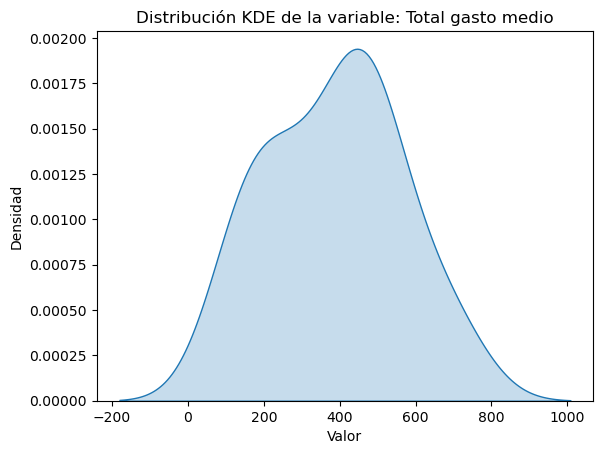

In [141]:

import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

# Reemplaza 'columna' por el nombre real de tu variable
sns.kdeplot(gasto_medio_anual_corr_CA['Total'], fill=True)
plt.title('Distribución KDE de la variable: Total gasto medio')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.show()

Preparamos DF para  ANOVA  (Análisis de la varianza)

In [162]:
gasto_medio_filtrado = gasto_medio_filtrado[
      ~gasto_medio['Destino'].isin(['Ceuta', 'Melilla']) &
      (gasto_medio['Pais_residencia'] == 'Total') 
    
]

gasto_medio_filtrado

,Destino,Pais_residencia,Año,Total
707,Islas Baleares,Total,2018,443.09
3515,País Vasco,Total,2018,142.83
473,Asturias,Total,2018,538.25
1877,Cataluña,Total,2018,327.34
1409,Castilla y León,Total,2018,190.97
...,...,...,...,...
936,Canarias,Total,2023,497.67
3744,La Rioja,Total,2023,407.20
3042,Región de Murcia,Total,2023,799.61
1872,Cataluña,Total,2023,369.45


In [163]:
# Limpiamos espacios antes y después, y unificamos nombres  del campo destino
gasto_medio_filtrado['Destino'] = gasto_medio_filtrado['Destino'].str.strip()


In [164]:
# Reemplazar los guiones por un espacio o vacío si lo prefieres
gasto_medio_filtrado['Destino'] = gasto_medio_filtrado['Destino'].str.replace('-', '', regex=False)

In [165]:
gasto_medio_filtrado['Destino'].unique()

array(['Islas Baleares', 'País Vasco', 'Asturias', 'Cataluña',
       'Castilla y León', 'Región de Murcia', 'La Rioja', 'Canarias',
       'Comunidad Valenciana', 'Comunidad de Madrid', 'Cantabria',
       'Navarra', 'Aragón', 'Andalucía', 'Galicia', 'CastillaLa Mancha',
       'Extremadura'], dtype=object)

In [166]:
print(gasto_medio_filtrado.isnull().sum())

Destino            0
Pais_residencia    0
Año                0
Total              0
dtype: int64


eliminar nulls

In [167]:
gasto_medio_filtrado

,Destino,Pais_residencia,Año,Total
707,Islas Baleares,Total,2018,443.09
3515,País Vasco,Total,2018,142.83
473,Asturias,Total,2018,538.25
1877,Cataluña,Total,2018,327.34
1409,Castilla y León,Total,2018,190.97
...,...,...,...,...
936,Canarias,Total,2023,497.67
3744,La Rioja,Total,2023,407.20
3042,Región de Murcia,Total,2023,799.61
1872,Cataluña,Total,2023,369.45


 ANOVA  (Análisis de la varianza) para verificar relación entre gasto medio y comunidad autonoma

p < 0.05 → hay diferencias estadísticamente significativas, si hay diferencia de gasto entre comunidades autonoma

permite comparar las medias de una variable numérica entre diferentes grupos de una variable categórica.

Si el valor p de ANOVA es bajo, significa que al menos uno de los grupos tiene una media significativamente diferente de los demás.



In [169]:
gasto_medio_filtrado['Total'].isna()


707     False
3515    False
473     False
1877    False
1409    False
        ...  
936     False
3744    False
3042    False
1872    False
0       False
Name: Total, Length: 102, dtype: bool

In [150]:
# Eliminar filas con valores nulos en la columna 'Total'
gasto_medio_filtrado = gasto_medio_filtrado.dropna(subset=['Total'])

In [170]:
from scipy.stats import f_oneway

# Agrupamos por 'Destino' (comunidad autónoma) y tomamos los valores de 'Total' de cada grupo
grupos = [grupo['Total'].values for nombre, grupo in gasto_medio_filtrado.groupby('Destino')]

# Calculamos ANOVA
f_stat, p_valor = f_oneway(*grupos)

# Mostramos el valor p
print(f"Valor p: {p_valor}")
# Mostrar p sin notación científica
print(f"Valor p: {p_valor:.40f}")  # Mostramos 40 decimales



Valor p: 3.823620552632881e-38
Valor p: 0.0000000000000000000000000000000000000382


prueba post-hoc (como Tukey's HSD).

La prueba compara todas las comunidades entre sí para determinar dónde están las diferencias significativas

In [171]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Realizamos la prueba de Tukey (post-hoc)
tukey = pairwise_tukeyhsd(gasto_medio_filtrado['Total'], gasto_medio_filtrado['Destino'], alpha=0.05)

# Mostramos los resultados de Tukey
print(tukey.summary())


                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
       group1               group2         meandiff p-adj    lower     upper   reject
-------------------------------------------------------------------------------------
           Andalucía               Aragón -111.4483 0.0681 -226.4719    3.5752  False
           Andalucía             Asturias    146.09 0.0022   31.0664  261.1136   True
           Andalucía             Canarias   58.6217 0.9188  -56.4019  173.6452  False
           Andalucía            Cantabria   55.1117 0.9503  -59.9119  170.1352  False
           Andalucía      Castilla y León -198.1367    0.0 -313.1602  -83.1131   True
           Andalucía    CastillaLa Mancha   51.4133 0.9728  -63.6102  166.4369  False
           Andalucía             Cataluña   -85.035 0.4148 -200.0586   29.9886  False
           Andalucía Comunidad Valenciana  227.0367    0.0  112.0131  342.0602   True
           Andalucía  Comunidad de Madrid   20.9433   

Graficamos la distribución del gasto medio por comunidad autonoma

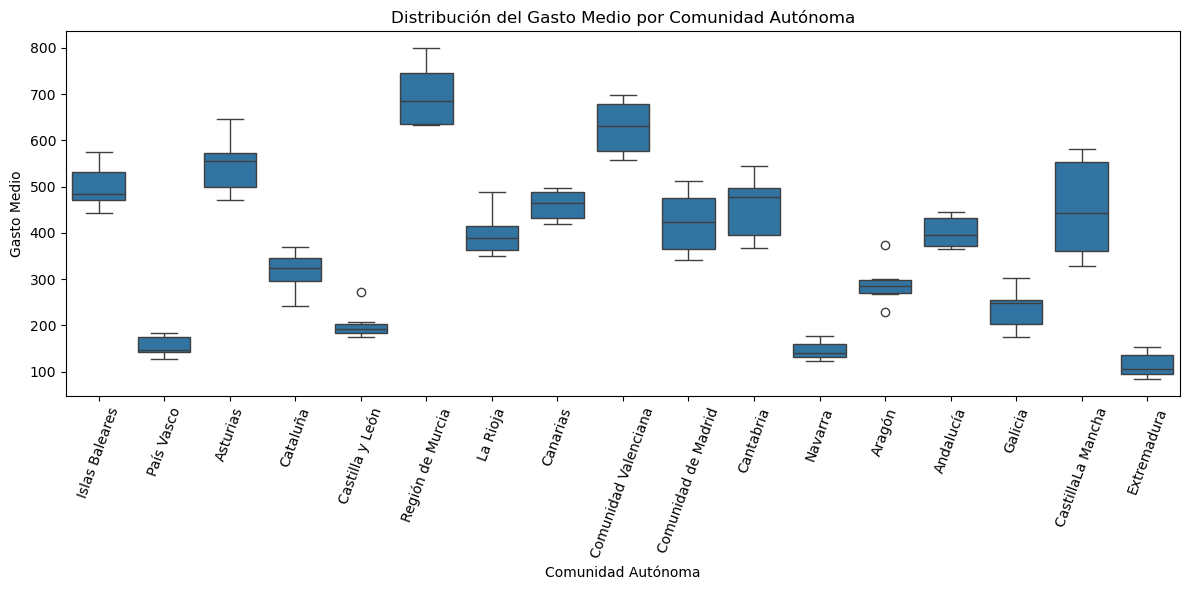

In [172]:

# Creamos el boxplot para visualizar la relación entre 'Destino' y 'Total' (Gasto medio)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Destino', y='Total', data=gasto_medio_filtrado)


plt.title('Distribución del Gasto Medio por Comunidad Autónoma')
plt.xticks(rotation=70)  
plt.ylabel('Gasto Medio')
plt.xlabel('Comunidad Autónoma')

plt.tight_layout()
plt.show()


# Tabla Gasto medio diario por visitante extranjero según comunidad autónoma y país de residencia  2018 - 2023

Estadística experimental.

Estadística experimental. Distribución del gasto realizado por los visitantes extranjeros en sus visitas a España

El objetivo de esta estadística experimental es proporcionar información trimestral sobre el gasto en destino real realizado por los visitantes extranjeros en sus visitas a España, con el fin de obtener una mayor desagregación que la proporcionada por la Encuesta de gasto turístico (EGATUR), tanto de los países de residencia como de las comunidades autónomas de destino. Todo ello considerando las premisas de secreto y significatividad estadística.

La información de base es la Encuesta de gasto turístico a la que se ha incorporado información auxiliar de transacciones bancarias realizadas a través de tarjetas por los visitantes no residentes en España en sus viajes o excursiones en nuestro país. Estas transacciones incluyen las realizadas a través de tarjeta de manera presencial (pagos realizados a través de Terminal Punto de Venta o TPV), así como retiradas de efectivo en cajeros.

https://ine.es/dynt3/inebase/index.htm?padre=7459

In [27]:
ruta = r"C:\Users\giuia\OneDrive\ESPECIALIZACION\Proyecto_Data_Analitycs\BBDD\Gasto medio diario por visitante según comunidad autónoma y país de residencia.csv"
gasto_medio_diario = pd.read_csv(ruta, encoding='latin1', sep=';')

gasto_medio_diario

,ï»¿Comunidades y Ciudades AutÃ³nomas de destino,PaÃ­s de residencia,Periodo,Total
0,AndalucÃ­a,Total,2023,"81,8"
1,AndalucÃ­a,Total,2022,"76,78"
2,AndalucÃ­a,Total,2021,"67,32"
3,AndalucÃ­a,Total,2020,"64,97"
4,AndalucÃ­a,Total,2019,"70,11"
...,...,...,...,...
4441,Melilla,Resto del Mundo,2022,"154,4"
4442,Melilla,Resto del Mundo,2021,"63,71"
4443,Melilla,Resto del Mundo,2020,.
4444,Melilla,Resto del Mundo,2019,.


ETL

In [28]:
# Renombrar columnas
gasto_medio_diario.rename(columns={'ï»¿Comunidades y Ciudades AutÃ³nomas de destino': 'Destino','PaÃ­s de residencia': 'Pais_residencia', 'Periodo': 'Año'}, inplace= True)

# remplazar , por . -  Convertir a Float y pasar nana a 0
gasto_medio_diario['Total'] = pd.to_numeric(gasto_medio_diario['Total'].str.replace(',', '.'), errors='coerce').astype(float)

# Reemplazar los valores en la columna 'Destino'
gasto_medio_diario['Destino'] = gasto_medio_diario['Destino'].replace({
    'AndalucÃ\xada': 'Andalucía',
    'AragÃ³n': 'Aragón',
    'Asturias, Principado de': 'Asturias',
    'Balears, Illes': 'Islas Baleares',
    'Cantabria': 'Cantabria',
    'Castilla y LeÃ³n': 'Castilla y León',
    'Castilla - La Mancha': 'Castilla-La Mancha',
    'CataluÃ±a': 'Cataluña',
    'Comunitat Valenciana': 'Comunidad Valenciana',
    'Extremadura': 'Extremadura',
    'Galicia': 'Galicia',
    'Madrid, Comunidad de': 'Comunidad de Madrid',
    'Murcia, RegiÃ³n de': 'Región de Murcia',
    'Navarra, Comunidad Foral de': 'Navarra',
    'PaÃ\xads Vasco': 'País Vasco',
    'Rioja, La': 'La Rioja',
    'Ceuta': 'Ceuta',
    'Melilla': 'Melilla'
})

# Reemplazar los valores en la 'Pais de Residencia'
gasto_medio_diario['Pais_residencia'] = gasto_medio_diario['Pais_residencia'].replace({
    'AndalucÃ\xada': 'Andalucía',
    'BÃ©lgica': 'Belgica',
    'PaÃ\xadses Bajos': 'Paises Bajos',
    'RumanÃ\xada': 'Rumania',
    'Otros PaÃ\xadses Europeos': 'Otros Paieses Europeos',
    'CanadÃ¡': 'Canada',
    'Estados Unidos de AmÃ©rica': 'USA',
    'MÃ©xico': 'Mexico',
    'Resto de AmÃ©rica': 'Resto de America',
    'Arabia SaudÃ\xad' : ' Arabia Saudi',
    'Emiratos Ã\x81rabes Unidos': 'Emiratos Arebe Unidos',
    'JapÃ³n' : 'Japon',
    'TurquÃ\xada' : 'Turquia'
    
    
})

# borrar los Totales anuales 
'''gasto_medio_diario.drop(
        gasto_medio_diario[gasto_medio_diario['Pais_residencia'] == 'Total'].index,inplace=True)'''

"gasto_medio_diario.drop(\n        gasto_medio_diario[gasto_medio_diario['Pais_residencia'] == 'Total'].index,inplace=True)"

In [29]:
gasto_medio_diario

,Destino,Pais_residencia,Año,Total
0,Andalucía,Total,2023,81.80
1,Andalucía,Total,2022,76.78
2,Andalucía,Total,2021,67.32
3,Andalucía,Total,2020,64.97
4,Andalucía,Total,2019,70.11
...,...,...,...,...
4441,Melilla,Resto del Mundo,2022,154.40
4442,Melilla,Resto del Mundo,2021,63.71
4443,Melilla,Resto del Mundo,2020,NaN
4444,Melilla,Resto del Mundo,2019,NaN


In [30]:
# Filtro quitamos registros sin datos (0)
gasto_medio_diario_filtrado =gasto_medio_diario[
     gasto_medio_diario['Total'] != 0
            
            ].sort_values(by= 'Año', ascending= True)

gasto_medio_diario_filtrado

,Destino,Pais_residencia,Año,Total
4445,Melilla,Resto del Mundo,2018,NaN
1307,Cantabria,Canada,2018,72.68
623,Asturias,USA,2018,83.18
2765,Galicia,Corea,2018,77.78
2237,Comunidad Valenciana,Brasil,2018,69.54
...,...,...,...,...
3042,Región de Murcia,Total,2023,76.98
1872,Cataluña,Total,2023,107.11
846,Islas Baleares,Colombia,2023,72.59
1854,Castilla-La Mancha,Japon,2023,65.36


# Duración media viaje según CA de destino 2019 - 2024

Estadística experimental. Medición del turismo a partir de teléfonos móviles

En síntesis, lo que se pretende con este estudio es conocer de forma agregada, a través de la señalización de los teléfonos móviles, mediante eventos activos y pasivos captados por las antenas de telefonía:

La procedencia y país/países que visitan los turistas residentes en sus viajes al extranjero.
La procedencia de los turistas extranjeros que visitan las distintas comunidades autónomas, provincias y municipios.
La procedencia y destino de los turistas residentes que visitan las distintas comunidades autónomas, provincias y municipios.

In [55]:
ruta = r"C:\Users\giuia\OneDrive\ESPECIALIZACION\Proyecto_Data_Analitycs\BBDD\Número de turistas, pernoctaciones y duración media por CCAA de destino.csv"
duracion_media = pd.read_csv(ruta, encoding='latin1', sep=';')

duracion_media

,ï»¿Continente y paÃ­s de residencia,Continente y paÃ­s de residencia,Continente y paÃ­s de residencia.1,Continente y paÃ­s de residencia.2,CCAA de destino,Concepto turÃ­stico,Periodo,Total
0,Total,NaN,NaN,NaN,AndalucÃ­a,Turistas,2024M12,766.873
1,Total,NaN,NaN,NaN,AndalucÃ­a,Turistas,2024M11,975.376
2,Total,NaN,NaN,NaN,AndalucÃ­a,Turistas,2024M10,1.427.668
3,Total,NaN,NaN,NaN,AndalucÃ­a,Turistas,2024M09,1.405.521
4,Total,NaN,NaN,NaN,AndalucÃ­a,Turistas,2024M08,1.665.797
...,...,...,...,...,...,...,...,...
835555,Total,OceanÃ­a,Otros paÃ­ses o territorios de OceanÃ­a,NaN,Total Nacional,DuraciÃ³n media de los viajes,2019M11,NaN
835556,Total,OceanÃ­a,Otros paÃ­ses o territorios de OceanÃ­a,NaN,Total Nacional,DuraciÃ³n media de los viajes,2019M10,NaN
835557,Total,OceanÃ­a,Otros paÃ­ses o territorios de OceanÃ­a,NaN,Total Nacional,DuraciÃ³n media de los viajes,2019M09,NaN
835558,Total,OceanÃ­a,Otros paÃ­ses o territorios de OceanÃ­a,NaN,Total Nacional,DuraciÃ³n media de los viajes,2019M08,NaN


ETL

In [56]:
#Borrar primera columna 0 y 4
duracion_media.drop(columns=[duracion_media.columns[0], duracion_media.columns[3]], inplace=True)



# Renombrar columnas
duracion_media.rename(columns={
    'Continente y paÃ­s de residencia' : 'Continente_residencia',
    'Continente y paÃ­s de residencia.1' : 'Pais_residencia',
    'CCAA de destino' : 'Destino',
    'Concepto turÃ­stico': 'Concepto'
    
}, inplace= True)

# Renombrar valores 'Continente_residencia'
duracion_media['Continente_residencia'] = duracion_media['Continente_residencia'].replace({
    'Ã\x81frica' : 'Africa',
    'AmÃ©rica' : 'America',
    'OceanÃ\xada': 'Oceania' 
})


# Renombrar valores 'Pais_residencia'
duracion_media['Pais_residencia']= duracion_media['Pais_residencia'].replace({
    'BelarÃºs': 'Bielorrusia',
    'BÃ©lgica': 'Bélgica',
    'HungrÃ\xada': 'Hungría',
    'MÃ³naco': 'Mónaco',
    'PaÃ\xadses Bajos': 'Países Bajos',
    'RepÃºblica Checa': 'Republica Checa',
    'RepÃºblica Eslovaca': 'Republica Eslovaca',
    'RumanÃ\xada': 'Rumanía',
    'TurquÃ\xada': 'Turquía',
    'UniÃ³n Europea (sin EspaÃ±a)': 'Unión Europea (sin España)',
    'CamerÃºn': 'Camerún',
    'EtiopÃ\xada': 'Etiopía',
    'GabÃ³n': 'Gabón',
    'NÃ\xadger': 'Níger',
    'RepÃºblica Centroafricana': 'República Centroafricana',
    'RepÃºblica DemocrÃ¡tica del Congo': 'República Democrática del Congo',
    'Santo TomÃ© y PrÃ\xadncipe': 'Santo Tomé y Príncipe',
    'SudÃ¡frica': 'Sudáfrica',
    'SudÃ¡n': 'Sudán',
    'TÃºnez': 'Túnez',
    'PapÃºa Nueva Guinea': 'Papúa Nueva Guinea',
    'Islas SalomÃ³n': 'Islas Salomón',
    'Otros paÃ\xadses o territorios de Europa': 'Otros países o territorios de Europa',
    'Otros paÃ\xadses o territorios de Asia': 'Otros países o territorios de Asia',
    'Otros paÃ\xadses o territorios de OceanÃ\xada': 'Otros países o territorios de Oceanía'
    
})

# Reemplazar los valores en la columna 'Destino'
duracion_media['Destino'] = duracion_media['Destino'].replace({
    'AndalucÃ\xada': 'Andalucía',
    'AragÃ³n': 'Aragón',
    'Asturias, Principado de': 'Asturias',
    'Balears, Illes': 'Islas Baleares',
    'Cantabria': 'Cantabria',
    'Castilla y LeÃ³n': 'Castilla y León',
    'Castilla - La Mancha': 'Castilla-La Mancha',
    'CataluÃ±a': 'Cataluña',
    'Comunitat Valenciana': 'Comunidad Valenciana',
    'Extremadura': 'Extremadura',
    'Galicia': 'Galicia',
    'Madrid, Comunidad de': 'Comunidad de Madrid',
    'Murcia, RegiÃ³n de': 'Región de Murcia',
    'Navarra, Comunidad Foral de': 'Navarra',
    'PaÃ\xads Vasco': 'País Vasco',
    'Rioja, La': 'La Rioja',
    'Ceuta': 'Ceuta',
    'Melilla': 'Melilla'
})

# Reemplazar los valores en la columna 'Concepto'
duracion_media['Concepto'] = duracion_media['Concepto'].replace({
    'DuraciÃ³n media de los viajes' : 'Duracion_media_viaje'
    
})


# Establecer la configuración regional a español (España)
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')


# Extraer el año y el mes con split M
duracion_media["Año"] = duracion_media["Periodo"].str.split('M').str[0]
duracion_media["mes"] = duracion_media["Periodo"].str.split('M').str[1]

# Convertir a números
duracion_media["mes"] = pd.to_numeric(duracion_media["mes"], errors='coerce')

# Extraer el nombre del mes en español
duracion_media["Nom_mes"] = pd.to_datetime(duracion_media["mes"], format='%m').dt.month_name(locale='es_ES.UTF-8')

# Convertir a int
duracion_media['Año'] = duracion_media['Año'].astype(int)

# Borrar columnas no necesarias
duracion_media.drop('Periodo', axis=1, inplace=True)



# Mover 'Concepto' a la penúltima posición y 'Total' a la última
columnas = [col for col in duracion_media.columns if col not in ['Concepto', 'Total']] \
           + ['Concepto', 'Total']

# Reordenar el DataFrame
duracion_media = duracion_media[columnas]

#Borrar todos los registros   ''Turistas'' segun columna 'Concepto'
duracion_media.drop(
    duracion_media[duracion_media['Concepto'] == 'Turistas'].index,
    inplace=True
)

# filtrar para obtener total informado
duracion_media_total_informado= duracion_media[
    (duracion_media['Total'].notna()) & ~duracion_media['Total'].isin(['.', '']) 
]

# filtrar para obtener df sin pais/contiente origen 
duracion_media_sin_origen= duracion_media_total_informado[
    (duracion_media_total_informado['Continente_residencia'].isna()) & (duracion_media_total_informado['Pais_residencia'].isna())
    
    ]

# Borrar las columnas para obtener df final
df_final = duracion_media_sin_origen.drop(columns=[duracion_media_total_informado.columns[0], duracion_media_total_informado.columns[1]])



In [57]:
df_final

,Destino,Año,mes,Nom_mes,Concepto,Total
66,Andalucía,2024,12,Diciembre,Pernoctaciones,6.482.430
67,Andalucía,2024,11,Noviembre,Pernoctaciones,6.915.870
68,Andalucía,2024,10,Octubre,Pernoctaciones,10.147.427
69,Andalucía,2024,9,Septiembre,Pernoctaciones,9.666.313
70,Andalucía,2024,8,Agosto,Pernoctaciones,12.662.222
...,...,...,...,...,...,...
3955,Total Nacional,2019,11,Noviembre,Duracion_media_viaje,8
3956,Total Nacional,2019,10,Octubre,Duracion_media_viaje,"7,3"
3957,Total Nacional,2019,9,Septiembre,Duracion_media_viaje,"6,8"
3958,Total Nacional,2019,8,Agosto,Duracion_media_viaje,"7,9"


crear DF con solo duracion media viaje

In [58]:
Duracion_media_viaje = df_final[
    df_final['Concepto'] == 'Duracion_media_viaje'
    
    ]
    
Duracion_media_viaje 

,Destino,Año,mes,Nom_mes,Concepto,Total
132,Andalucía,2024,12,Diciembre,Duracion_media_viaje,"8,5"
133,Andalucía,2024,11,Noviembre,Duracion_media_viaje,"7,1"
134,Andalucía,2024,10,Octubre,Duracion_media_viaje,"7,1"
135,Andalucía,2024,9,Septiembre,Duracion_media_viaje,"6,9"
136,Andalucía,2024,8,Agosto,Duracion_media_viaje,"7,6"
...,...,...,...,...,...,...
3955,Total Nacional,2019,11,Noviembre,Duracion_media_viaje,8
3956,Total Nacional,2019,10,Octubre,Duracion_media_viaje,"7,3"
3957,Total Nacional,2019,9,Septiembre,Duracion_media_viaje,"6,8"
3958,Total Nacional,2019,8,Agosto,Duracion_media_viaje,"7,9"


In [59]:
# Reemplazar comas por puntos y convertir a float
Duracion_media_viaje["Total"] = Duracion_media_viaje["Total"].str.replace(",", ".").astype(float)


In [17]:
Duracion_media_viaje.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1320 entries, 132 to 3959
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Destino   1320 non-null   object 
 1   Año       1320 non-null   int32  
 2   mes       1320 non-null   int64  
 3   Nom_mes   1320 non-null   object 
 4   Concepto  1320 non-null   object 
 5   Total     1320 non-null   float64
dtypes: float64(1), int32(1), int64(1), object(3)
memory usage: 67.0+ KB


Preparar df para la correlación 

In [69]:
Duracion_media_viaje_corr_CA = Duracion_media_viaje[
    (Duracion_media_viaje['Destino'] != 'Total Nacional') &
    (~Duracion_media_viaje['Destino'].isin(['Ceuta', 'Melilla'])) &
    (Duracion_media_viaje['Año'] != 2024) 
    ] \
    .groupby(['Destino'])['Total'] \
    .mean() \
    .reset_index(name='Total') \
    .round(2)

Duracion_media_viaje_corr_CA


,Destino,Total
0,Andalucía,8.78
1,Aragón,7.95
2,Asturias,9.94
3,Canarias,8.78
4,Cantabria,8.99
5,Castilla y León,7.92
6,Castilla-La Mancha,9.40
7,Cataluña,7.18
8,Comunidad Valenciana,9.43
9,Comunidad de Madrid,8.28


In [73]:
from scipy.stats import shapiro

stat, p = shapiro(Duracion_media_viaje_corr_CA['Total'].dropna())
print(f'Estadístico={stat:.3f}, p={p:.3f}')

if p > 0.05:
    print("✅ Probablemente distribución normal")
else:
    print("❌ Probablemente NO distribución normal")


Estadístico=0.965, p=0.730
✅ Probablemente distribución normal


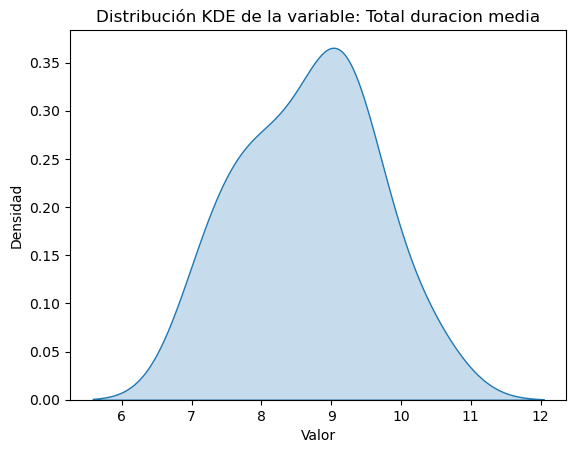

In [ ]:

sns.kdeplot(Duracion_media_viaje_corr_CA['Total'], fill=True)
plt.title('Distribución KDE de la variable: Total duracion media')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.show()

Crear df Pernoctaciones 

In [36]:
Pernoctaciones = df_final[
    df_final['Concepto'] == 'Pernoctaciones'
    
    ]

Pernoctaciones

,Destino,Año,mes,Nom_mes,Concepto,Total
66,Andalucía,2024,12,Diciembre,Pernoctaciones,6.482.430
67,Andalucía,2024,11,Noviembre,Pernoctaciones,6.915.870
68,Andalucía,2024,10,Octubre,Pernoctaciones,10.147.427
69,Andalucía,2024,9,Septiembre,Pernoctaciones,9.666.313
70,Andalucía,2024,8,Agosto,Pernoctaciones,12.662.222
...,...,...,...,...,...,...
3889,Total Nacional,2019,11,Noviembre,Pernoctaciones,41.355.784
3890,Total Nacional,2019,10,Octubre,Pernoctaciones,54.936.740
3891,Total Nacional,2019,9,Septiembre,Pernoctaciones,57.164.950
3892,Total Nacional,2019,8,Agosto,Pernoctaciones,85.225.670


In [37]:
# remplazar , por '' -  Convertir a int y 
Pernoctaciones['Total'] = pd.to_numeric(Pernoctaciones['Total'].str.replace('.', ''), errors='coerce').astype(int)

In [38]:
Pernoctaciones
    
               

,Destino,Año,mes,Nom_mes,Concepto,Total
66,Andalucía,2024,12,Diciembre,Pernoctaciones,6482430
67,Andalucía,2024,11,Noviembre,Pernoctaciones,6915870
68,Andalucía,2024,10,Octubre,Pernoctaciones,10147427
69,Andalucía,2024,9,Septiembre,Pernoctaciones,9666313
70,Andalucía,2024,8,Agosto,Pernoctaciones,12662222
...,...,...,...,...,...,...
3889,Total Nacional,2019,11,Noviembre,Pernoctaciones,41355784
3890,Total Nacional,2019,10,Octubre,Pernoctaciones,54936740
3891,Total Nacional,2019,9,Septiembre,Pernoctaciones,57164950
3892,Total Nacional,2019,8,Agosto,Pernoctaciones,85225670


In [39]:
Pernoctaciones

,Destino,Año,mes,Nom_mes,Concepto,Total
66,Andalucía,2024,12,Diciembre,Pernoctaciones,6482430
67,Andalucía,2024,11,Noviembre,Pernoctaciones,6915870
68,Andalucía,2024,10,Octubre,Pernoctaciones,10147427
69,Andalucía,2024,9,Septiembre,Pernoctaciones,9666313
70,Andalucía,2024,8,Agosto,Pernoctaciones,12662222
...,...,...,...,...,...,...
3889,Total Nacional,2019,11,Noviembre,Pernoctaciones,41355784
3890,Total Nacional,2019,10,Octubre,Pernoctaciones,54936740
3891,Total Nacional,2019,9,Septiembre,Pernoctaciones,57164950
3892,Total Nacional,2019,8,Agosto,Pernoctaciones,85225670


# Gasto/duración media viaje  de los turistas internacionales según motivo principal del viaje 2016/2024

encuesta de gasto turistico EGATUR (INE)

In [55]:
ruta = r"C:\Users\giuia\OneDrive\ESPECIALIZACION\Proyecto_Data_Analitycs\BBDD\Gasto de los turistas internacionales según motivo principal del viaje.csv"
gasto_segun_motivo = pd.read_csv(ruta, encoding='latin1', sep=';')

gasto_segun_motivo

,ï»¿Motivo del viaje,Gastos y duraciÃ³n media de los viajes,Tipo de dato,Periodo,Total
0,Total,Gasto total,Dato base,2024,"126.143,22"
1,Total,Gasto total,Dato base,2023,"108.789,41"
2,Total,Gasto total,Dato base,2022,"87.138,19"
3,Total,Gasto total,Dato base,2021,"34.903,37"
4,Total,Gasto total,Dato base,2020,"19.786,78"
...,...,...,...,...,...
1147,Otros,DuraciÃ³n media de los viajes,Tasa de variaciÃ³n anual,2020,"24,42"
1148,Otros,DuraciÃ³n media de los viajes,Tasa de variaciÃ³n anual,2019,"-7,28"
1149,Otros,DuraciÃ³n media de los viajes,Tasa de variaciÃ³n anual,2018,"13,65"
1150,Otros,DuraciÃ³n media de los viajes,Tasa de variaciÃ³n anual,2017,"-31,33"


ETL

In [56]:
# Renombrar columnas
gasto_segun_motivo.rename(columns={
    'ï»¿Motivo del viaje' : 'Motivo',
    'Gastos y duraciÃ³n media de los viajes': 'Gasto_dur_media',
    
    
}, inplace= True)


# Reemplazar los valores en la columna 'Motivo'
gasto_segun_motivo['Motivo'] = gasto_segun_motivo['Motivo'].replace({
    'Estudios (educaciÃ³n y formaciÃ³n)':  'Estudios',
    'PrÃ¡ctica deportiva': 'Practica seportiva'
    
})

# Reemplazar los valores en la columna 'Gasto_dur_media'
gasto_segun_motivo['Gasto_dur_media'] = gasto_segun_motivo['Gasto_dur_media'].replace({
    'DuraciÃ³n media de los viajes':  'Duracion media',
    
    
})

#Borrar todos los registros  'Tasa de variaciÃ³n anual' segun columna 'Tipo de dato'
gasto_segun_motivo.drop(
    gasto_segun_motivo[gasto_segun_motivo['Tipo de dato'] == 'Tasa de variaciÃ³n anual'].index,
    inplace=True
)

# Borrar columna
del gasto_segun_motivo['Tipo de dato'] 

#Reenombrar columna
gasto_segun_motivo.rename(columns={'Periodo': 'Año'}, inplace=True)

In [57]:
gasto_segun_motivo

,Motivo,Gasto_dur_media,Año,Total
0,Total,Gasto total,2024,"126.143,22"
1,Total,Gasto total,2023,"108.789,41"
2,Total,Gasto total,2022,"87.138,19"
3,Total,Gasto total,2021,"34.903,37"
4,Total,Gasto total,2020,"19.786,78"
...,...,...,...,...
1138,Otros,Duracion media,2020,"7,25"
1139,Otros,Duracion media,2019,"5,83"
1140,Otros,Duracion media,2018,"6,28"
1141,Otros,Duracion media,2017,"5,53"


Crear df duración media según motivo

In [63]:
# Eliminar registros distintos a 'Duracion media'
Motivo_dur_media = gasto_segun_motivo.drop(
      gasto_segun_motivo[gasto_segun_motivo['Gasto_dur_media'] != 'Duracion media'].index
      
)

Motivo_dur_media

,Motivo,Gasto_dur_media,Año,Total
54,Total,Duracion media,2024,"7,23"
55,Total,Duracion media,2023,"7,22"
56,Total,Duracion media,2022,"7,5"
57,Total,Duracion media,2021,"8,15"
58,Total,Duracion media,2020,"7,82"
...,...,...,...,...
1138,Otros,Duracion media,2020,"7,25"
1139,Otros,Duracion media,2019,"5,83"
1140,Otros,Duracion media,2018,"6,28"
1141,Otros,Duracion media,2017,"5,53"


In [64]:
# Reemplazar comas por puntos y convertir a float
Motivo_dur_media["Total"] = pd.to_numeric(
    Motivo_dur_media["Total"].str.replace(",", "."), errors="coerce"
)

#Reenombrar columna 
Motivo_dur_media.rename(columns={'Gasto_dur_media' : 'Duracion_viaje'}, inplace= True)

In [65]:
Motivo_dur_media_total = Motivo_dur_media[
    Motivo_dur_media['Motivo'] == 'Total'
                 
                 ].groupby(['Motivo','Año'])['Total'].mean().reset_index()

Motivo_dur_media_total

,Motivo,Año,Total
0,Total,2016,7.88
1,Total,2017,7.74
2,Total,2018,7.45
3,Total,2019,7.11
4,Total,2020,7.82
5,Total,2021,8.15
6,Total,2022,7.50
7,Total,2023,7.22
8,Total,2024,7.23


In [66]:
from scipy.stats import shapiro

stat, p = shapiro(Motivo_dur_media_total['Total'].dropna())
print(f'Estadístico={stat:.3f}, p={p:.3f}')

if p > 0.05:
    print("✅ Probablemente distribución normal")
else:
    print("❌ Probablemente NO distribución normal")

Estadístico=0.949, p=0.681
✅ Probablemente distribución normal


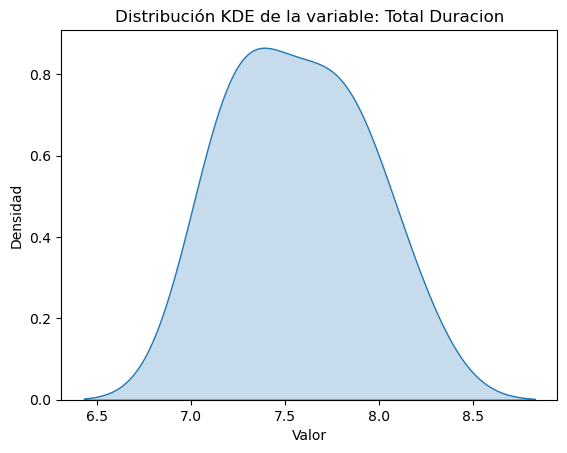

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt

# Reemplaza 'columna' por el nombre real de tu variable
sns.kdeplot(Motivo_dur_media_total['Total'], fill=True)
plt.title('Distribución KDE de la variable: Total Duracion')
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.show()

Crear df gasto medio según motivo

In [67]:
# Eliminar registros =  'Duracion media'
Motivo_gasto_medio = gasto_segun_motivo.drop(
      gasto_segun_motivo[gasto_segun_motivo['Gasto_dur_media'] == 'Duracion media'].index
)

#Reenombrar columna 
Motivo_gasto_medio.rename(columns={'Gasto_dur_media' : 'Gasto_medio'}, inplace= True)

Motivo_gasto_medio

,Motivo,Gasto_medio,Año,Total
0,Total,Gasto total,2024,"126.143,22"
1,Total,Gasto total,2023,"108.789,41"
2,Total,Gasto total,2022,"87.138,19"
3,Total,Gasto total,2021,"34.903,37"
4,Total,Gasto total,2020,"19.786,78"
...,...,...,...,...
1120,Otros,Gasto medio diario por persona,2020,93
1121,Otros,Gasto medio diario por persona,2019,111
1122,Otros,Gasto medio diario por persona,2018,125
1123,Otros,Gasto medio diario por persona,2017,114


In [68]:
# Eliminar registros 'Gasto total' 
Motivo_gasto_medio.drop(
   Motivo_gasto_medio[
       (Motivo_gasto_medio['Motivo'] == 'Total') & 
   (Motivo_gasto_medio['Gasto_medio'] == 'Gasto total')
    
   ].index, inplace= True
)

In [76]:
Motivo_gasto_medio

,Motivo,Gasto_medio,Año,Total
18,Total,Gasto medio por persona,2024,1345
19,Total,Gasto medio por persona,2023,1277
20,Total,Gasto medio por persona,2022,1216
21,Total,Gasto medio por persona,2021,1119
22,Total,Gasto medio por persona,2020,1045
...,...,...,...,...
1120,Otros,Gasto medio diario por persona,2020,93
1121,Otros,Gasto medio diario por persona,2019,111
1122,Otros,Gasto medio diario por persona,2018,125
1123,Otros,Gasto medio diario por persona,2017,114


Preparar Df para averiguar si las 4 variables total tienen una distribución normal (Gaussiana)
mediante el Shapiro-Wilk Test 
ya que tenemos < de 5000 datos

p > 0.05: no hay evidencia para decir que no es normal → se acepta normalidad.

p ≤ 0.05: hay evidencia de que no es normal → se rechaza la hipótesis de normalidad.



In [78]:
# Reemplazar '.', '' y convertirlos a nan
Motivo_gasto_medio['Total'] = Motivo_gasto_medio['Total'].replace(['.', ''], np.nan)

# Eliminar solo el primer punto para mantener decimales
Motivo_gasto_medio['Total'] = Motivo_gasto_medio['Total'].str.replace(r'\.', '', n=1, regex=True)

# Reemplazar ',', '.' 
Motivo_gasto_medio['Total'] = Motivo_gasto_medio['Total'].str.replace(',', '.')


In [80]:
Motivo_gasto_medio = Motivo_gasto_medio.dropna(subset=['Total'])
Motivo_gasto_medio['Total'] = Motivo_gasto_medio['Total'].astype(int)


In [81]:
Motivo_gasto_medio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 399 entries, 18 to 1124
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Motivo       399 non-null    object
 1   Gasto_medio  399 non-null    object
 2   Año          399 non-null    int64 
 3   Total        399 non-null    int32 
dtypes: int32(1), int64(1), object(2)
memory usage: 14.0+ KB


In [82]:
df = Motivo_gasto_medio[
   ( Motivo_gasto_medio['Motivo'] == 'Total') &
   ( Motivo_gasto_medio['Gasto_medio'] == 'Gasto medio por persona')
                   
                   ].groupby(['Motivo','Año'])['Total'].mean().reset_index()

df


,Motivo,Año,Total
0,Total,2016,1028.0
1,Total,2017,1063.0
2,Total,2018,1084.0
3,Total,2019,1101.0
4,Total,2020,1045.0
5,Total,2021,1119.0
6,Total,2022,1216.0
7,Total,2023,1277.0
8,Total,2024,1345.0


In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(df['Total'].dropna())
print(f'Estadístico={stat:.3f}, p={p:.3f}')

if p > 0.05:
    print("✅ Probablemente distribución normal")
else:
    print("❌ Probablemente NO distribución normal")


Estadístico=0.881, p=0.160
✅ Probablemente distribución normal


In [ ]:
Gasto_medio_segun_motivo =Motivo_gasto_medio[
         (  Motivo_gasto_medio['Motivo'] != 'Total') &
         (  Motivo_gasto_medio['Gasto_medio'] == 'Gasto medio por persona') 
                                              ].groupby('Motivo')['Total'].mean().reset_index().round(2)

Gasto_medio_segun_motivo

,Motivo,Total
0,"Asistencia a ferias, congresos y convenciones",1316.43
1,"Compras, servicios personales",678.00
2,Estudios,3782.44
3,Motivos religiosos o peregrinaciones,1506.12
4,"Negocio, motivos profesionales",1173.89
5,"Ocio, recreo y vacaciones",1136.11
6,Otro tipo de ocio,1117.89
7,Otros,743.78
8,Otros motivos de trabajo y negocio,1178.33
9,Practica seportiva,1064.00


In [ ]:
from scipy.stats import shapiro

stat, p = shapiro(Gasto_medio_segun_motivo['Total'].dropna())
print(f'Estadístico={stat:.3f}, p={p:.3f}')

if p > 0.05:
    print("✅ Probablemente distribución normal")
else:
    print("❌ Probablemente NO distribución normal")

Estadístico=0.568, p=0.000
❌ Probablemente NO distribución normal


In [86]:
Motivo_dur_media

,Motivo,Duracion_viaje,Año,Total
54,Total,Duracion media,2024,7.23
55,Total,Duracion media,2023,7.22
56,Total,Duracion media,2022,7.50
57,Total,Duracion media,2021,8.15
58,Total,Duracion media,2020,7.82
...,...,...,...,...
1138,Otros,Duracion media,2020,7.25
1139,Otros,Duracion media,2019,5.83
1140,Otros,Duracion media,2018,6.28
1141,Otros,Duracion media,2017,5.53


In [87]:
Duracion_media_segun_motivo = Motivo_dur_media[
    Motivo_dur_media['Motivo'] != 'Total'
                                               
].groupby('Motivo')['Total'].mean().reset_index().round(2)

Duracion_media_segun_motivo

,Motivo,Total
0,"Asistencia a ferias, congresos y convenciones",4.14
1,"Compras, servicios personales",4.82
2,Estudios,39.51
3,Motivos religiosos o peregrinaciones,12.04
4,"Negocio, motivos profesionales",5.77
5,"Ocio, recreo y vacaciones",7.33
6,Otro tipo de ocio,6.71
7,Otros,6.13
8,Otros motivos de trabajo y negocio,5.54
9,Practica seportiva,6.56


In [88]:
from scipy.stats import shapiro

stat, p = shapiro(Duracion_media_segun_motivo['Total'].dropna())
print(f'Estadístico={stat:.3f}, p={p:.3f}')

if p > 0.05:
    print("✅ Probablemente distribución normal")
else:
    print("❌ Probablemente NO distribución normal")

Estadístico=0.515, p=0.000
❌ Probablemente NO distribución normal


 Shapiro-Wilk Test confirma distribución que se refleja en los graficos kdeplot en Powewr BI para las 4 variables